In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
#dataset = https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset/data

In [3]:
BATCHSIZE = 32
LG_IMGSIZE = (256,256)
SM_IMGSIZE = (32,32)

In [4]:
dataDir = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\\Shlok\\College\\THIRD_YEAR\\SEM 6 NOTES\\DL\\Assignments\\Codes\\Assignment7\\data",
    batch_size = BATCHSIZE,
    image_size = LG_IMGSIZE,
)

Found 4188 files belonging to 4 classes.


In [5]:
classNames = dataDir.class_names
classNames

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

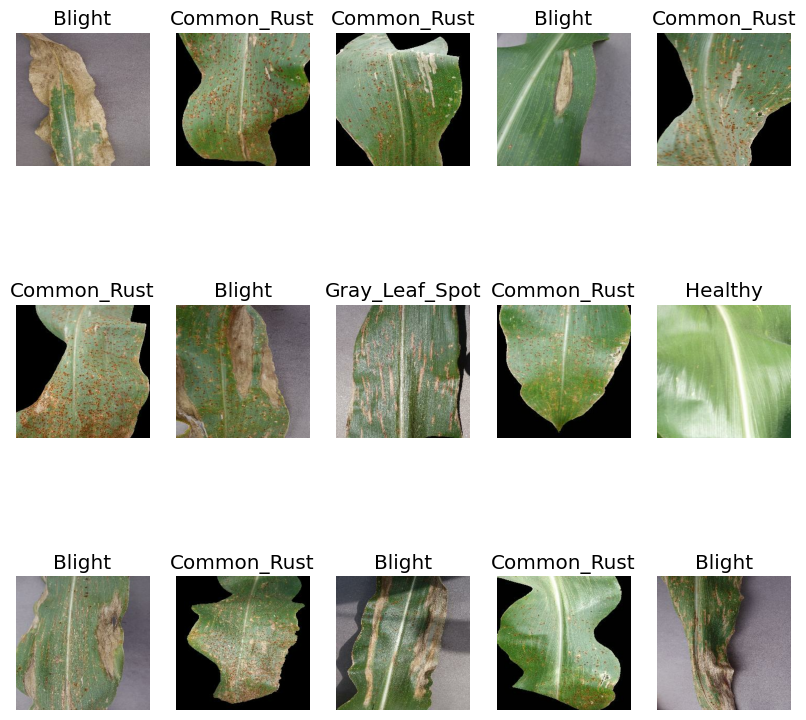

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in dataDir.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classNames[labels[i]], fontsize='x-large', fontweight='ultralight')
        plt.axis("off")

In [7]:
trainDS = tf.keras.utils.image_dataset_from_directory(
    "D:\\Shlok\\College\\THIRD_YEAR\\SEM 6 NOTES\\DL\\Assignments\\Codes\\Assignment7\\data",
    batch_size = BATCHSIZE,
    image_size = SM_IMGSIZE,
    subset="training",
    seed=123,
    validation_split=0.2,
    shuffle=True
)

validDS = tf.keras.utils.image_dataset_from_directory(
    "D:\\Shlok\\College\\THIRD_YEAR\\SEM 6 NOTES\\DL\\Assignments\\Codes\\Assignment7\\data",
    batch_size = BATCHSIZE,
    image_size = SM_IMGSIZE,
    subset="validation",
    seed=123,
    validation_split=0.2,
    shuffle=True
)

testDS = tf.keras.utils.image_dataset_from_directory(
    "D:\\Shlok\\College\\THIRD_YEAR\\SEM 6 NOTES\\DL\\Assignments\\Codes\\Assignment7\\data",
    batch_size = BATCHSIZE,
    image_size = SM_IMGSIZE,
    seed=123,
    shuffle=True
    
)

Found 4188 files belonging to 4 classes.
Using 3351 files for training.
Found 4188 files belonging to 4 classes.
Using 837 files for validation.
Found 4188 files belonging to 4 classes.


In [8]:
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3

In [10]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(trainDS, epochs=30, validation_data=(validDS))

Epoch 1/30
105/105 [==============================] - 11s 88ms/step - loss: 0.7676 - accuracy: 0.6685 - val_loss: 0.5132 - val_accuracy: 0.7849
Epoch 2/30
105/105 [==============================] - 5s 39ms/step - loss: 0.4884 - accuracy: 0.8001 - val_loss: 0.4666 - val_accuracy: 0.7957
Epoch 3/30
105/105 [==============================] - 4s 31ms/step - loss: 0.4728 - accuracy: 0.7974 - val_loss: 0.4748 - val_accuracy: 0.7826
Epoch 4/30
105/105 [==============================] - 3s 30ms/step - loss: 0.4002 - accuracy: 0.8266 - val_loss: 0.3886 - val_accuracy: 0.8160
Epoch 5/30
105/105 [==============================] - 3s 30ms/step - loss: 0.3677 - accuracy: 0.8400 - val_loss: 0.3777 - val_accuracy: 0.8172
Epoch 6/30
105/105 [==============================] - 4s 30ms/step - loss: 0.3363 - accuracy: 0.8583 - val_loss: 0.3356 - val_accuracy: 0.8435
Epoch 7/30
105/105 [==============================] - 3s 30ms/step - loss: 0.3015 - accuracy: 0.8753 - val_loss: 0.3545 - val_accuracy: 0.836

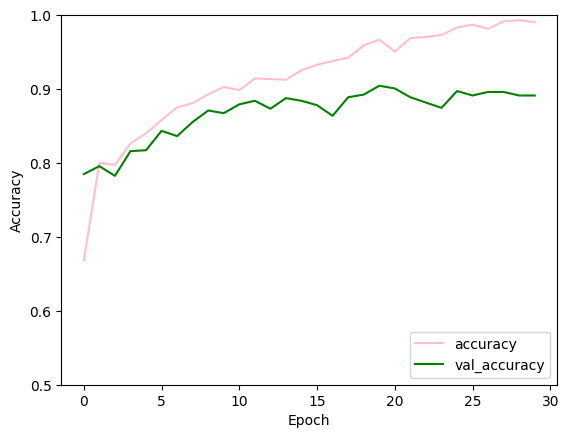

In [19]:
plt.plot(history.history['accuracy'], label='accuracy', color='pink')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
test_loss, test_accuracy = model.evaluate(testDS, verbose=2)

131/131 - 3s - loss: 0.1097 - accuracy: 0.9725 - 3s/epoch - 26ms/step


In [13]:
print(test_accuracy)

0.9725406169891357


In [14]:
yTrue = []
yPred = []

for images, labels in testDS:
    predictions = model.predict(images)
    predictClasses = np.argmax(predictions, axis=1)
    
    yTrue.extend(labels.numpy())
    yPred.extend(predictClasses)

1/1 [==============================] - 0s 72ms/step


In [15]:
cr = classification_report(yTrue, yPred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1146
           1       0.99      0.98      0.99      1306
           2       0.94      0.90      0.92       574
           3       1.00      1.00      1.00      1162

    accuracy                           0.97      4188
   macro avg       0.97      0.96      0.97      4188
weighted avg       0.97      0.97      0.97      4188



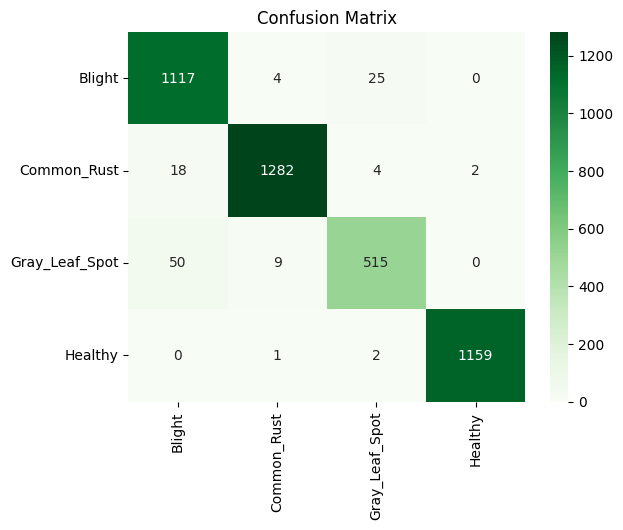

In [18]:
cf = confusion_matrix(yTrue, yPred)

sns.heatmap(cf, annot=True, fmt='g', cmap='Greens', xticklabels=classNames, yticklabels=classNames)
plt.title("Confusion Matrix")
plt.show()